# CGDP Feature Cleaning

## initial import and setup of Chinese GDP

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [137]:
df = pd.read_csv("../raw_data/TradingViewData/CNGDP/ECONOMICS_CNGDP, M UNIX.csv")
df.head()

,time,open,high,low,close,Volume,Volume MA
0,-286675200,5.972000e+10,5.972000e+10,5.972000e+10,5.972000e+10,NaN,NaN
1,-255139200,5.006000e+10,5.006000e+10,5.006000e+10,5.006000e+10,NaN,NaN
2,-223603200,4.721000e+10,4.721000e+10,4.721000e+10,4.721000e+10,NaN,NaN
3,-192067200,5.071000e+10,5.071000e+10,5.071000e+10,5.071000e+10,NaN,NaN
4,-160444800,5.971000e+10,5.971000e+10,5.971000e+10,5.971000e+10,NaN,NaN


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       62 non-null     int64  
 1   open       62 non-null     float64
 2   high       62 non-null     float64
 3   low        62 non-null     float64
 4   close      62 non-null     float64
 5   Volume     0 non-null      float64
 6   Volume MA  0 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 3.5 KB


In [139]:
df['time'] = pd.to_datetime(df['time'], unit='s', origin="unix")

In [140]:
df = df.set_index(["time"])

In [141]:
df = df[df.index>"1993-12-01"]

In [142]:
df = df[["close"]]

In [143]:
df

,close
time,
1994-12-01,5.643200e+11
1995-12-01,7.345500e+11
1996-12-01,8.637500e+11
1997-12-01,9.616000e+11
1998-12-01,1.029040e+12
1999-12-01,1.094000e+12
2000-12-01,1.211350e+12
2001-12-01,1.339400e+12
2002-12-01,1.470550e+12


<AxesSubplot: xlabel='time'>

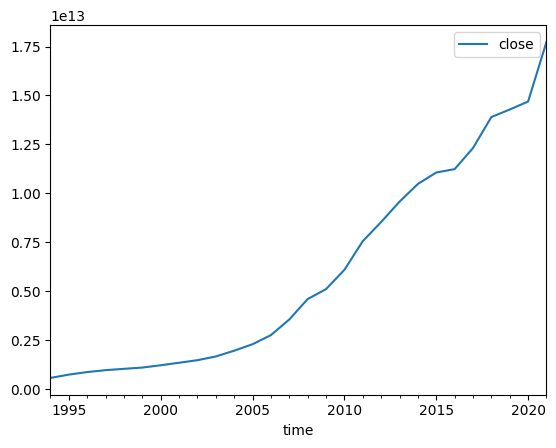

In [144]:
df.plot()

## Chinese GDP Daily Interpolation

In [156]:
len(df)

28

In [205]:
datetime_index = pd.date_range(start="1994-12-01", end="2021-12-01", name="time")
len(datetime_index)

9863

In [206]:
cngdp_df = pd.DataFrame(index=datetime_index)

In [207]:
cngdp_df["cngdp"] = df["close"]

In [208]:
cngdp_df

,cngdp
time,
1994-12-01,5.643200e+11
1994-12-02,NaN
1994-12-03,NaN
1994-12-04,NaN
1994-12-05,NaN
...,...
2021-11-27,NaN
2021-11-28,NaN
2021-11-29,NaN


In [209]:
cngdp_df.interpolate(method="linear", inplace=True)

In [239]:
cngdp_df.head(3)

,cngdp
time,
1994-12-01,5.643200e+11
1994-12-02,5.647864e+11
1994-12-03,5.652528e+11


# Merge Chinese GDP to BDI Dataframe

In [212]:
bdi_df = pd.read_csv("../raw_data/TradingViewData/BDI/cleaned_weekly_BDI.csv")

In [213]:
bdi_df

,time,close
0,1995-01-16,2059.0
1,1995-01-23,1983.0
2,1995-01-30,1959.0
3,1995-02-06,1980.0
4,1995-02-13,1992.0
...,...,...
1436,2022-10-17,1819.0
1437,2022-10-24,1534.0
1438,2022-10-31,1323.0
1439,2022-11-07,1355.0


In [214]:
bdi_df = bdi_df.set_index("time")

In [215]:
bdi_df

,close
time,
1995-01-16,2059.0
1995-01-23,1983.0
1995-01-30,1959.0
1995-02-06,1980.0
1995-02-13,1992.0
...,...
2022-10-17,1819.0
2022-10-24,1534.0
2022-10-31,1323.0


In [219]:
cngdp_df[cngdp_df["cngdp"].index > "1995-01-15"]

,cngdp
time,
1995-01-16,5.857736e+11
1995-01-17,5.862400e+11
1995-01-18,5.867064e+11
1995-01-19,5.871728e+11
1995-01-20,5.876392e+11
...,...
2021-11-27,1.770067e+13
2021-11-28,1.770902e+13
2021-11-29,1.771737e+13


In [235]:
bdi_df.index = pd.to_datetime(bdi_df.index)

In [236]:
bdi_df.index

DatetimeIndex(['1995-01-16', '1995-01-23', '1995-01-30', '1995-02-06',
               '1995-02-13', '1995-02-20', '1995-02-27', '1995-03-06',
               '1995-03-13', '1995-03-20',
               ...
               '2022-09-12', '2022-09-19', '2022-09-26', '2022-10-03',
               '2022-10-10', '2022-10-17', '2022-10-24', '2022-10-31',
               '2022-11-07', '2022-11-14'],
              dtype='datetime64[ns]', name='time', length=1441, freq=None)

In [241]:
#Combine bdi_df to cngdp_df:

combined_df = pd.merge(bdi_df, cngdp_df, on="time", how="inner")

In [242]:
combined_df

,close,cngdp
time,,
1995-01-16,2059.0,5.857736e+11
1995-01-23,1983.0,5.890383e+11
1995-01-30,1959.0,5.923030e+11
1995-02-06,1980.0,5.955677e+11
1995-02-13,1992.0,5.988324e+11
...,...,...
2021-11-01,2715.0,1.748367e+13
2021-11-08,2807.0,1.754210e+13
2021-11-15,2552.0,1.760052e+13


In [240]:
len(combined_df)

1441

## Adding Growth Rate of CNGDP per week

Lots of feature generation is possible as growth rate is of course dependent on start and end time-frame. For now, I will simply create the growth rate per week, then per month, and then potentially per year.

In [ ]:
def growth_rate_weekly(df):
    """Create the growth rare by week"""
    for i in range()

In [ ]:
combined_df["cngdp_growth_rate"] = 